In [1]:
import init

from analisys.bkt_analisys import *
from analisys.data_analisys import *
from analisys.graph_analisys import *
from analisys.optmizer_analisys import *


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import os

os.chdir('lab')

from backend.resampler import *
from backend.mt5_tools import *

from statsmodels.tsa.stattools import adfuller
from analisys.graph_analisys import moving_avg
from secrets import token_hex as token


import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.orca.config.use_xvfb = True


from arch import arch_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
xls_list = os.listdir()
xls_list

df = []

for i in xls_list:
    
    try:
        __df = pd.read_excel(i, index_col = 0)
        __df['index']=list(__df.index)
        
        df.append(__df)
        
    except:
        continue
print(len(df))
_df = df[0]

_df.info()
sum(_df['return'])

work_data = _df.drop(columns=['index'])
work_data.head()


1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          243 non-null    object        
 1   date_open     243 non-null    datetime64[ns]
 2   date_close    243 non-null    datetime64[ns]
 3   x_name        243 non-null    object        
 4   y_name        243 non-null    object        
 5   x_type        243 non-null    object        
 6   y_type        243 non-null    object        
 7   y_openprice   243 non-null    float64       
 8   y_closeprice  243 non-null    float64       
 9   x_openprice   243 non-null    float64       
 10  x_closeprice  243 non-null    float64       
 11  x_volume      243 non-null    int64         
 12  y_volume      243 non-null    int64         
 13  expo          243 non-null    float64       
 14  return        243 non-null    float64       
 15  roi           243 non-null    float64 

,type,date_open,date_close,x_name,y_name,x_type,y_type,y_openprice,y_closeprice,x_openprice,...,s_spread,l_spread,tp_short,tp_long,s_number,period,count,min_count,std_returns,std_profit
0,short_spread,2019-02-15 13:45:00,2019-02-19 14:25:00,ITSA4,BBSE3,buy,sell,23.00,23.38,10.54,...,1,-5,0,1,28,107,122,122,0.808286,6.751248
1,short_spread,2019-02-19 12:50:00,2019-02-20 16:25:00,BBDC3,IRBR3,buy,sell,26.75,26.93,24.84,...,1,-5,0,1,76,195,279,279,NaN,NaN
2,long_spread,2019-02-18 15:40:00,2019-02-20 11:20:00,ITSA4,MULT3,sell,buy,23.92,23.79,10.49,...,3,-1,0,0,36,122,261,261,NaN,NaN
3,long_spread,2019-02-15 13:20:00,2019-02-18 16:10:00,ITUB4,CYRE3,sell,buy,13.87,14.03,26.64,...,1,1,-1,0,41,119,100,100,NaN,NaN
4,long_spread,2019-02-18 16:15:00,2019-02-20 10:10:00,ITUB4,CYRE3,sell,buy,14.02,13.97,26.59,...,1,1,-1,0,41,119,100,100,NaN,NaN


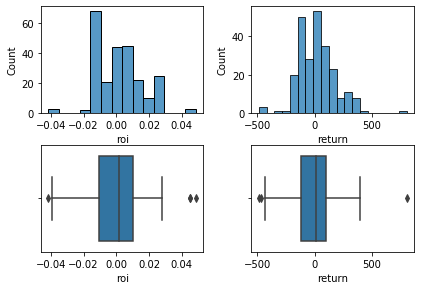

In [3]:
fig, axs = plt.subplots(2,2)
plt.tight_layout()
sns.histplot(work_data['roi'], ax=axs[0][0])
sns.histplot(work_data['return'], ax=axs[0][1])
sns.boxplot(work_data['roi'], ax=axs[1][0])
sns.boxplot(work_data['return'], ax=axs[1][1])

In [4]:
remove2 = ['y_openprice', 'y_closeprice', 'x_openprice', 'x_closeprice', 'x_volume', 'y_volume', 'expo']
roi_c = [i > 0 for i in _df['roi']]

_work_df = _df.drop(columns=remove2)
_work_df['roi_c'] = roi_c

group = _work_df.groupby(by=['x_name', 'y_name'])
group_std = _work_df.groupby(by=['x_name', 'y_name']).std()
group_max = _work_df.groupby(by=['x_name', 'y_name']).max()
group_mean = _work_df.groupby(by=['x_name', 'y_name']).mean()
group_sum = _work_df.groupby(by=['x_name', 'y_name']).std()

group_mean


return       roi  s_spread  l_spread  tp_short   tp_long  \
x_name y_name                                                                 
B3SA3  CIEL3  -173.000000 -0.015867  1.000000 -2.000000 -1.000000  1.000000   
       CYRE3  -118.000000 -0.011813  3.000000 -1.000000  0.000000  1.000000   
       IRBR3   302.000000  0.026343  3.000000  0.000000  0.000000  1.000000   
       ITSA4  -122.000000 -0.010789  1.000000  1.000000  0.000000  1.000000   
       MULT3    93.000000  0.008129  1.000000  0.000000 -1.000000  1.000000   
...                   ...       ...       ...       ...       ...       ...   
SANB11 MULT3  -148.000000 -0.010408  2.000000 -1.000000  0.000000  1.000000   
       SULA11  118.000000  0.008942  1.000000  1.000000 -1.000000  0.000000   
SULA11 BBDC3  -126.000000 -0.010271  1.000000 -1.000000  0.000000  0.000000   
       BBSE3   204.000000  0.016599  4.000000 -1.000000 -1.000000  1.000000   
       SANB11   12.666667  0.001040  1.666667 -2.333333 -0.666667  0.333333   

               s_number      period       count   min_count  std_returns  \
x_name y_name                                                              
B3SA3  CIEL3       91.0  116.000000  157.000000  157.000000          NaN   
       CYRE3       33.0  242.000000  237.000000  237.000000          NaN   
       IRBR3       61.0  122.000000  238.000000  238.000000          NaN   
       ITSA4       25.0  248.000000  148.000000  148.000000          NaN   
       MULT3       66.0  249.000000  115.000000  115.000000          NaN   
...                 ...         ...         ...         ...          ...   
SANB11 MULT3       26.0  244.000000  125.000000  125.000000          NaN   
       SULA11      97.0  172.000000  300.000000  300.000000          NaN   
SULA11 BBDC3       24.0  226.000000  198.000000  198.000000          NaN   
       BBSE3       61.0  186.000000  115.000000  115.000000    13.722383   
       SANB11      30.0  108.666667  261.666667  261.666667          NaN   

               std_profit       index     roi_c  
x_name y_name                                    
B3SA3  CIEL3          NaN  234.000000  0.000000  
       CYRE3          NaN  235.000000  0.000000  
       IRBR3          NaN  238.000000  1.000000  
       ITSA4          NaN   36.000000  0.000000  
       MULT3          NaN  240.000000  1.000000  
...                   ...         ...       ...  
SANB11 MULT3          NaN  179.000000  0.000000  
       SULA11         NaN  185.000000  1.000000  
SULA11 BBDC3          NaN  178.000000  0.000000  
       BBSE3    90.853801  203.000000  1.000000  
       SANB11         NaN  172.333333  0.666667  

[81 rows x 14 columns]

In [20]:
def single_backtest(start_data, end_data, name_x, name_y, timeframe, s_spread,
                    l_spread, tp_short,tp_long, stop_number,
                    period, min_count, p_size):
                    
    #hist_x = mt5_singlehistoricaldata(name_x,timeframe,start_data, end_data)
    #hist_y = mt5_singlehistoricaldata(name_y,timeframe,start_data, end_data)

    hist_x = mt5_singlehistoricaldata(name_x,timeframe,start_data - timedelta( days= 1), end_data + timedelta(days= 7))
    hist_y = mt5_singlehistoricaldata(name_y,timeframe,start_data - timedelta(days= 1), end_data + timedelta(days= 7))

    result = runbkt(hist_x, hist_y, name_x, name_y, period, s_spread, l_spread, tp_short, tp_long, stop_number, min_count ,p_size)
    return result, hist_x, hist_y
                    

In [21]:
from datetime import timedelta, date

data = list(work_data.iloc()[0])
work_data.iloc()[0]
data[1] = data[1] - timedelta(days=1)
data[2] = data[2] + timedelta(days=0)


In [27]:
''''
result, hist_x, hist_y = single_backtest(start_data=data[1],
                                        end_data=data[2],
                                        name_x=data[3],
                                        name_y=data[4],
                                        timeframe=5,
                                        s_spread=data[17],
                                        l_spread=data[18],
                                        tp_short=data[19],
                                        tp_long=data[20],
                                        stop_number=data[21],
                                        period=data[22],
                                        min_count=data[23],
                                        p_size = 1000
                                        )

'''
start_date = date(2021, 11, 22)
end_date = date(2022,1,9)

result, hist_x, hist_y = single_backtest(start_data=start_date,
                                        end_data=end_date,
                                        name_x='BRML3',
                                        name_y='SULA11',
                                        timeframe=5,
                                        s_spread=2,
                                        l_spread=-5,
                                        tp_short=-1,
                                        tp_long=1,
                                        stop_number=1143,
                                        period=89,
                                        min_count=290,
                                        p_size = 1000
                                        )



In [28]:
result['returns']

[279.0000000000006, -258.00000000000057]

fail


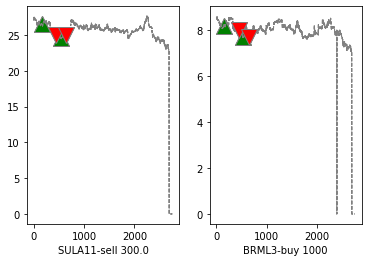

In [29]:
#só para pegar os pontos de compra e venda#


positions_markers_buy = []
positions_markers_sell = []

for mark in result['positions_list']:

    if(mark['type'] == 'long_spread'):
        positions_markers_buy.append(mark['df_iteration'][1])
        positions_markers_sell.append(mark['df_iteration'][0])

    if(mark['type'] == 'short_spread'):
        positions_markers_buy.append(mark['df_iteration'][0])
        positions_markers_sell.append(mark['df_iteration'][1])

        
        
positions_markers_sell, positions_markers_buy

#graficos

hist_x_open = np.array(hist_x['open'])
hist_x_close = np.array(hist_x['close'])
hist_y_open = np.array(hist_y['open'])
hist_y_close = np.array(hist_y['close'])


for idx in np.where(hist_x_close == 0):
    try:
        hist_x_close[idx] = (hist_x_close[idx-1] + hist_x_close[idx+1])/2
    except:
        print('fail')

xs_axis = range(len(hist_x_open))

#short_spread => X_BUY, Y_SELL
#long_spread  => X_SELL, Y_BUY

fig, axs = plt.subplots(1, 2)

result['positions_list']

#grarficos

for mark in result['positions_list']:
    
    if(mark['type'] == 'long_spread'):
        
        axs[0].plot(hist_x_close, color = 'gray', linestyle='--',  linewidth=1 ,marker='^', markersize=16, markerfacecolor='green', markevery=positions_markers_buy)
        axs[0].plot(hist_x_close, color = 'gray', linestyle='--',linewidth=1 , marker='v', markersize=16, markerfacecolor='red', markevery=positions_markers_sell)
        axs[0].set_xlabel('{}-{} {}'.format(result['info']['x_symbol'],result['positions_list'][result['positions_list'].index(mark)]['x_type'], result['positions_list'][result['positions_list'].index(mark)]['x_volume']))

        axs[1].plot(hist_y_close, color = 'gray', linestyle='--', linewidth=1 ,marker='^', markersize=16, markerfacecolor='green', markevery=positions_markers_buy)
        axs[1].plot(hist_y_close, color = 'gray', linestyle='--', linewidth=1 ,marker='v', markersize=16, markerfacecolor='red', markevery=positions_markers_sell)
        axs[1].set_xlabel('{}-{} {}'.format(result['info']['y_symbol'],result['positions_list'][result['positions_list'].index(mark)]['y_type'], result['positions_list'][result['positions_list'].index(mark)]['y_volume']))
    

    if(mark['type'] == 'short_spread'):

        axs[0].plot(hist_y_close, color = 'gray',linestyle='--',linewidth=1 , marker='^', markersize=16, markerfacecolor='green', markevery=positions_markers_buy)
        axs[0].plot(hist_y_close, color = 'gray', marker='v',linestyle='--',linewidth=1 , markersize=16, markerfacecolor='red', markevery=positions_markers_sell)
        axs[0].set_xlabel('{}-{} {}'.format(result['info']['y_symbol'],result['positions_list'][result['positions_list'].index(mark)]['y_type'], result['positions_list'][result['positions_list'].index(mark)]['y_volume']))
        
        axs[1].plot(hist_x_close, color = 'gray', marker='^',linestyle='--',linewidth=1 , markersize=16, markerfacecolor='green', markevery=positions_markers_buy)
        axs[1].plot(hist_x_close, color = 'gray', marker='v',linestyle='--',linewidth=1 , markersize=16, markerfacecolor='red', markevery=positions_markers_sell)
        axs[1].set_xlabel('{}-{} {}'.format(result['info']['x_symbol'],result['positions_list'][result['positions_list'].index(mark)]['x_type'], result['positions_list'][result['positions_list'].index(mark)]['x_volume']))



290
534.0


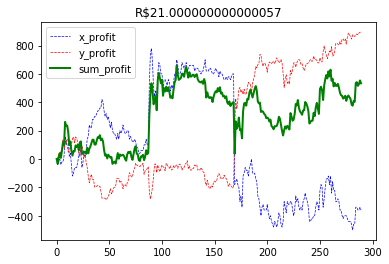

In [30]:
#auxilia a tratar alguns dados

df_iteration = result['positions_list'][0]['df_iteration']

x_lprofit = []
y_lprofit = []
np_hist_x = np.array(hist_x_close)[df_iteration[0]:df_iteration[1]+1]
np_hist_y = np.array(hist_y_close)[df_iteration[0]:df_iteration[1]+1]

x_volume = result['positions_list'][0]['x_volume']
y_volume = result['positions_list'][0]['y_volume']


for i in range(len(np_hist_x)):
    x_lprofit.append(x_volume*np_hist_x[i])
    y_lprofit.append(y_volume*np_hist_y[i])

x_profit = 0
y_profit = 0

for r in range(len(result['positions_list'])):
    if(result['positions_list'][r]['type'] == 'short_spread'):
        x_profit += np.array(x_lprofit) - x_lprofit[0]
        y_profit += -np.array(y_lprofit) + y_lprofit[0]


    if(result['positions_list'][r]['type'] == 'long_spread'):
        x_profit += -np.array(x_lprofit) + x_lprofit[0]
        y_profit += np.array(y_lprofit) - y_lprofit[0]


s_profit = x_profit + y_profit

print(len(x_profit))

fig, axs = plt.subplots(1, 1)



axs.plot(x_profit, label='x_profit', linestyle='--', linewidth=0.7, color='blue')
axs.plot(y_profit, label='y_profit', linestyle='--', linewidth=0.7, color='red')
axs.plot(s_profit,label='sum_profit', linewidth=2, color = 'green')
axs.legend(loc='upper left')
axs.set_title('R${}'.format(result['profit']))

print(s_profit[-1])